In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )


(500, 2)


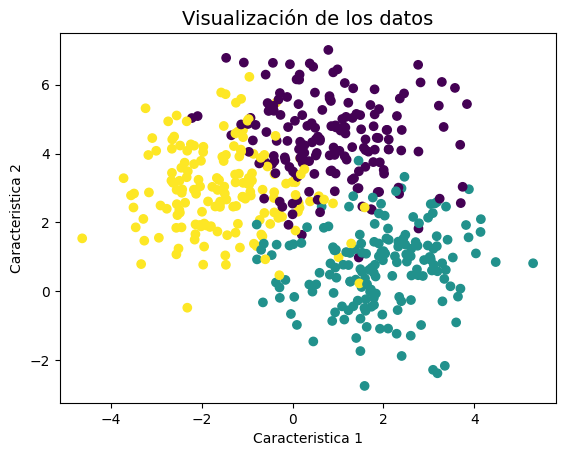

In [ ]:
print(X.shape)
plt.title('Visualización de los datos', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo
model = MLPClassifier(max_iter=1000, random_state=42, activation='relu')

# parametros
param_grid = {
    'hidden_layer_sizes': [(5,), (5,5), (5,5,5)],
}

cv = 5 # numero de kfolds
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [(5,), (5, 5), (5, 5, 5)]},
             scoring='accuracy')

Resultados de la búsqueda en cuadrícula:


,params,mean_test_score
0,"{'hidden_layer_sizes': (5,)}",0.860000
1,"{'hidden_layer_sizes': (5, 5)}",0.874286
2,"{'hidden_layer_sizes': (5, 5, 5)}",0.871429


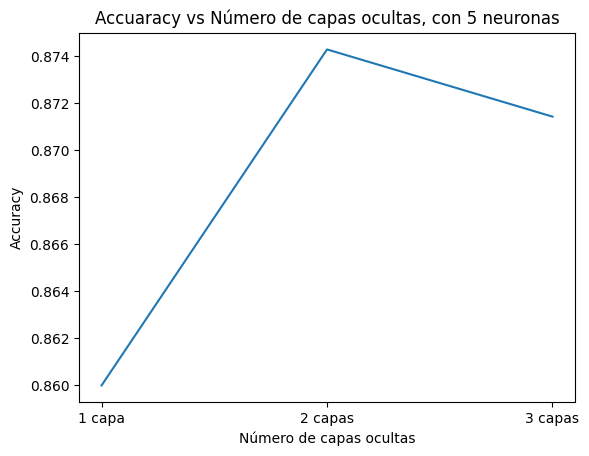

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
x_names = ["1 capa", "2 capas", "3 capas"]
y_accuracy = results['mean_test_score']
plt.plot(x_names,y_accuracy)
plt.xlabel('Número de capas ocultas')
plt.ylabel('Accuracy')
plt.title('Accuaracy vs Número de capas ocultas, con 5 neuronas')
plt.show()

#Seleccion mejor modelo

R/: se selecciona el modelo con 1 capa oculta, teniendo en cuenta que aunque el resto de capas dan mejor accuracy, esta diferencia es muy pequeña, exactamente 0.014, lo cual no amerita el aumento en la complejidad matematica.  

El mejor modelo queda con los siguientes hiperparametros:

**Número de redes neuronales:** 5

**Número de capas ocultas:** 1


In [ ]:
#validamos ya este codigo
model = MLPClassifier(max_iter=1000, random_state=42, activation='relu', hidden_layer_sizes= (5) )
model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_pred)
print(accuracy_test)


0.8533333333333334


El accuracy con los datos de test, nos muestra que el 85.3% de las predicciones del modelo son correctas, por ser datos de validacion podemos infererir que el modelo se comportara de esta forma en con datos reales.